<a href="https://colab.research.google.com/github/ReemYounis123/GenAI-projects/blob/main/CNN_MNIST_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()



Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"hebaallam","key":"d053b9f492d006eedb0918359081e4ad"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/


mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json


chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d manasmohapatra1998/minst-fashion-dataset

Dataset URL: https://www.kaggle.com/datasets/manasmohapatra1998/minst-fashion-dataset
License(s): CC0-1.0
 84% 33.0M/39.2M [00:01<00:00, 24.7MB/s]
100% 39.2M/39.2M [00:01<00:00, 26.0MB/s]


In [ ]:
!unzip <minst-fashion-dataset.zip>.zip


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist
print("Train shape : ",X_train.shape)
print("Test shape : ",X_test.shape)

Train shape :  (60000, 28, 28)
Test shape :  (10000, 28, 28)


In [ ]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = X_train / 255.0, X_test / 255.0

In [ ]:
# Reshape the data to fit the model
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical


# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/20
938/938 [==============================] - 10s 5ms/step - loss: 0.5872 - accuracy: 0.7888 - val_loss: 0.3870 - val_accuracy: 0.8591
Epoch 2/20
938/938 [==============================] - 5s 5ms/step - loss: 0.3898 - accuracy: 0.8612 - val_loss: 0.3351 - val_accuracy: 0.8783
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.3392 - accuracy: 0.8765 - val_loss: 0.3125 - val_accuracy: 0.8878
Epoch 4/20
938/938 [==============================] - 4s 5ms/step - loss: 0.3064 - accuracy: 0.8895 - val_loss: 0.2876 - val_accuracy: 0.8927
Epoch 5/20
938/938 [==============================] - 4s 5ms/step - loss: 0.2880 - accuracy: 0.8963 - val_loss: 0.2802 - val_accuracy: 0.8979
Epoch 6/20
938/938 [==============================] - 4s 5ms/step - loss: 0.2639 - accuracy: 0.9022 - val_loss: 0.2623 - val_accuracy: 0.9038
Epoch 7/20
938/938 [==============================] - 5s 5ms/step - loss: 0.2476 - accuracy: 0.9091 - val_loss: 0.2530 - val_accuracy: 0.9053
Epoch

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


313/313 [==============================] - 1s 2ms/step - loss: 0.2791 - accuracy: 0.9174
Test accuracy: 0.9174000024795532


In [ ]:
predictions = model.predict(x_test)


313/313 [==============================] - 1s 2ms/step


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


313/313 [==============================] - 1s 2ms/step - loss: 0.2791 - accuracy: 0.9174
Test loss: 0.2791
Test accuracy: 0.9174


313/313 [==============================] - 1s 2ms/step


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

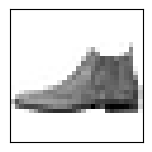

In [ ]:
# Make predictions
predictions = model.predict(x_test)

# Plot random samples from the test set with their predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f'Pred: {predicted_label} ({100*np.max(predictions[i]):.2f}%), True: {true_label}', color=color)
plt.tight_layout()
plt.show()
